In [236]:
#Loading rounds2.csv into a dataframe 
import pandas
import numpy

rounds2= pandas.read_csv(r"rounds2.csv", encoding='ISO-8859-1')
rounds2.company_permalink= rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

#finding unique values from rounds2 dataframe after changing it into upper case
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()
print(len(rounds2['company_permalink'].unique()))

66368


In [237]:
#Loading companies.txt into a dataframe
companies=pandas.read_csv(r"Companies.txt",sep="\t",encoding='ISO-8859-1')
companies.permalink= companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

#finding unique values from companies dataframe after changing it into upper case
companies['permalink'] = companies['permalink'].str.upper()
print(len(companies['permalink'].unique()))

66368


In [238]:
#comparing both the dataframes values
temprounds= pandas.DataFrame(rounds2.company_permalink.unique())
tempcompanies=pandas.DataFrame(companies.permalink.unique())
tempcompanies.equals(temprounds)

True

In [283]:
#merging both the data frames
master_frame = pandas.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

#for making plot of each funding type
m_frame_plot= master_frame[master_frame['funding_round_type'].isin(['angel','venture','seed','private_equity'])]
#m_frame_plot.head(10)
len(master_frame.index)

114949

In [271]:
#cleaning the data by finding the missing values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [273]:
#Dropping unnecessary rows which are having null values.
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() |
                            master_frame['category_list'].isnull())]

# Average funding of venture type
venture_Funding = master_frame.loc[master_frame.funding_round_type=='venture','raised_amount_usd']
print(venture_Funding.mean())

11724222.690204773


In [242]:
# Average funding of angel type
AngelFunding = master_frame.loc[master_frame.funding_round_type=='angel','raised_amount_usd']
print(AngelFunding.mean())

971573.8911363636


In [243]:
# Average funding of seed type
SeedFunding = master_frame.loc[master_frame.funding_round_type=='seed','raised_amount_usd']
print(SeedFunding.mean())

747793.6824840009


In [244]:
# Average funding of private equity type
PrivateEquityFunding = master_frame.loc[master_frame.funding_round_type=='private_equity','raised_amount_usd']
print(PrivateEquityFunding.mean())

73938486.27527472


In [287]:
# considering rows only with venture type of investment
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
#master_frame
#creating a dataframe named top9 and sorting values in a descending order
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)

#getting top english speaking countries out of the top 9 countries.
top9 = top9.iloc[:9,]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [246]:
#Extracting the primary sector value from the category list having multiple categories
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/ORGANIZATION/ZYRAZ-TECHNOLOGY,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0,/ORGANIZATION/ZYRAZ-TECHNOLOGY,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114934,/ORGANIZATION/ZYRRA,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,/ORGANIZATION/ZYRRA,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/ORGANIZATION/ZYSTOR,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,/ORGANIZATION/ZYSTOR,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/ORGANIZATION/ZYTOPROTEC,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0,/ORGANIZATION/ZYTOPROTEC,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007


In [247]:
# Reading mapping.csv into a dataframe named mapping
mapping= pandas.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping = pandas.melt(mapping, id_vars =['category_list'], value_vars=['Automotive & Sports',
          'Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging',
           'Others','Social, Finance, Analytics, Advertising']) 

#Dropping the column "value"
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)

#Rename the variable as main_sector
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [248]:
# merging the mapping dataframe into master_frame to get combined data
main_sector_frame = pandas.merge(master_frame,mapping, how = 'inner', on ='category_list')
main_sector_frame.drop(list(main_sector_frame.filter(regex='_y$')), axis=1, inplace=True)
main_sector_frame.drop(list(main_sector_frame.filter(regex='_x$')), axis=1, inplace=True)
main_sector_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media,operating,GBR,H9,London,London,01-01-2011,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47614,/ORGANIZATION/YAPTA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,C,25-06-2009,2000000.0,/ORGANIZATION/YAPTA,Yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others
47615,/ORGANIZATION/YAPTA,/funding-round/fc066baf3121b060b574214612a6c946,venture,NaN,29-07-2015,1786563.0,/ORGANIZATION/YAPTA,Yapta,http://www.yapta.com,Tracking,operating,USA,WA,Seattle,Seattle,01-07-2007,Others
47616,/ORGANIZATION/YUNNAN-LANDSUN-GREEN-INDUSTRY-GR...,/funding-round/83783f2b5911f41827bd6c72c1eee7fc,venture,NaN,01-07-2007,7227332.0,/ORGANIZATION/YUNNAN-LANDSUN-GREEN-INDUSTRY-GR...,Yunnan Landsun Green Industry (Group),http://www.lstea.tech-food.com/,Tea,operating,CHN,29,CHN - Other,Simao,01-05-1996,Others
47617,/ORGANIZATION/ZIFTIT,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,NaN,09-07-2013,4000000.0,/ORGANIZATION/ZIFTIT,Ziftit,http://www.ziftit.com,Gift Registries,closed,USA,CA,San Diego,San Diego,01-02-2011,Others


In [249]:
# Creating a new dataframe D1 for country_code 'USA' and funding type 'venture' and investments range of 5-15 M USD
D1 = main_sector_frame.loc[(main_sector_frame.country_code == 'USA') 
                          & (main_sector_frame.funding_round_type=='venture')
                          & (main_sector_frame.raised_amount_usd > 5000000)
                          & (main_sector_frame.raised_amount_usd < 15000000)]
D1 = D1.sort_values(by='raised_amount_usd', ascending = False)
D1.count().max()

9942

In [157]:
# Creating a new dataframe D2 for country_code 'GBR' and funding type 'venture' and investments range of 5-15 M USD
D2 = main_sector_frame.loc[(main_sector_frame.country_code == 'GBR') 
                          & (main_sector_frame.funding_round_type=='venture')
                          & (main_sector_frame.raised_amount_usd > 5000000)
                          & (main_sector_frame.raised_amount_usd < 15000000)]
D2 = D2.sort_values(by='raised_amount_usd', ascending = False)
D2.count().max()

559

In [251]:
# Creating a new dataframe D3 for country_code 'INDIA' and funding type 'venture' and investments range of 5-15 M USD
D3 = main_sector_frame.loc[(main_sector_frame.country_code == 'IND') 
                          & (main_sector_frame.funding_round_type=='venture')
                          & (main_sector_frame.raised_amount_usd > 5000000)
                          & (main_sector_frame.raised_amount_usd < 15000000)]
D3 = D3.sort_values(by='raised_amount_usd', ascending = False)
D3.count().max()

243

In [252]:
# Total amount of investment in USA in venture type of funding
D1.loc[:,'raised_amount_usd'].sum()

88638294664.0

In [253]:
# Total amount of investment in GBR in venture type of funding
D2.loc[:,'raised_amount_usd'].sum()

4875228300.0

In [254]:
# Total amount of investment in India in venture type of funding
D3.loc[:,'raised_amount_usd'].sum()

2174543602.0

In [255]:
# List of no. of investment sector-wise in USA
D1_USA = D1.groupby(['main_sector'])
D1_USA = pandas.DataFrame(D1_USA['company_permalink'].count()).sort_values('company_permalink', ascending=False)
D1_USA = D1_USA.reset_index()
D1_USA

,main_sector,company_permalink
0,Others,2423
1,"Social, Finance, Analytics, Advertising",2216
2,Cleantech / Semiconductors,1951
3,"News, Search and Messaging",1280
4,Health,760
5,Manufacturing,691
6,Entertainment,479
7,Automotive & Sports,142


In [256]:
# List of no. of investment sector-wise in GBR
D2_GBR = D2.groupby(['main_sector'])
D2_GBR = pandas.DataFrame(D2_GBR['company_permalink'].count()).sort_values('company_permalink', ascending=False)
D2_GBR = D2_GBR.reset_index()
D2_GBR

,main_sector,company_permalink
0,Others,129
1,Cleantech / Semiconductors,124
2,"Social, Finance, Analytics, Advertising",118
3,"News, Search and Messaging",65
4,Entertainment,48
5,Manufacturing,38
6,Health,23
7,Automotive & Sports,14


In [257]:
# List of no. of investment sector-wise in India
D3_INDIA = D3.groupby(['main_sector'])
D3_INDIA = pandas.DataFrame(D3_INDIA['company_permalink'].count()).sort_values('company_permalink', ascending=False)
D3_INDIA = D3_INDIA.reset_index()
D3_INDIA

,main_sector,company_permalink
0,Others,78
1,"Social, Finance, Analytics, Advertising",45
2,"News, Search and Messaging",41
3,Entertainment,23
4,Manufacturing,18
5,Health,17
6,Cleantech / Semiconductors,14
7,Automotive & Sports,7


In [258]:
# List of companies in USA which received investment in top sector i.e 'Others'
D1_USA_company = D1.loc[D1['main_sector'] == 'Others'].groupby('name')
Top_USA_Company= pandas.DataFrame(D1_USA_company['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
Top_USA_Company

,raised_amount_usd
name,
AirTight Networks,54201907.0
Bit9,48433533.0
Zilliant,45600000.0
Redfin,44800000.0
Five9,44600000.0
...,...
Naartjie,5071177.0
Camino Real,5068086.0
Lagotek,5063236.0


In [259]:
# List of companies in GBR which received investment in top sector i.e 'Others'
D2_GBR_company = D2.loc[D2['main_sector'] == 'Others'].groupby('name')
Top_GBR_Company= pandas.DataFrame(D2_GBR_company['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
Top_GBR_Company

,raised_amount_usd
name,
Electric Cloud,37000000.0
Enigmatec,32500000.0
OpenCloud,27972766.0
MyOptique Group,27694613.0
ACS Clothing,26239014.0
...,...
Biometric Security,5500000.0
ZBD Displays,5430000.0
Almondy,5407412.0


In [260]:
# List of companies in India which received investment in top sector i.e 'Others'
D3_IND_company = D3.loc[D3['main_sector'] == 'Others'].groupby('name')
Top_IND_Company= pandas.DataFrame(D3_IND_company['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
Top_IND_Company

,raised_amount_usd
name,
Myntra,33000000.0
FirstCry.com,24000000.0
NxtGen Data Center & Cloud Services,22300000.0
Maharana Infrastructure and Professional Services Private Limited (MIPS),21600000.0
India Property Online,19000000.0
...,...
GoldVIP Technology Solutions (Crown-it),5500000.0
Citrus Payment,5500000.0
Monarch Innovative Technologies,5500000.0


In [261]:
# List of companies in USA which received investment in second top sector
D1company_USA = D1.loc[D1['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')
SecondComp_USA= pandas.DataFrame(D1company_USA['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
SecondComp_USA

,raised_amount_usd
name,
SST Inc. (Formerly ShotSpotter),67933006.0
FirstRain,58344731.0
ChoiceStream,58300000.0
NetBase Solutions,55600000.0
ChaCha,53000000.0
...,...
newBrandAnalytics,5032735.0
Trueffect,5025000.0
Personal Blackbox,5020964.0


In [118]:
# List of companies in GBR which received investment in second top sector
D2company_GBR = D2.loc[D2['main_sector'] == 'Cleantech / Semiconductors'].groupby('name')
SecComp_GBR= pandas.DataFrame(D2company_GBR['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
SecComp_GBR

,raised_amount_usd
name,
EUSA Pharma,35600000.0
Horizon Discovery,31353719.0
F-star Biotechnology Limited,29132906.0
Takeda Cambridge,22340000.0
Immune Targeting Systems,20320961.0
...,...
Bourn Hall Clinic,5303380.0
Lamellar Biomedical,5301059.0
MMIC Solutions,5250000.0


In [262]:
# List of companies in India which received investment in second top sector
D3company_Ind = D3.loc[D3['main_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')
SecondCompany_Ind= pandas.DataFrame(D3company_Ind['raised_amount_usd'].sum()).sort_values('raised_amount_usd', ascending=False)
SecondCompany_Ind

,raised_amount_usd
name,
inTarvo,21900000.0
Grameen Financial Services,21556050.0
BankBazaar.com,19000000.0
Microland,18300000.0
Eka Software Solutions,16000000.0
Qyuki,15400000.0
Capital Float,13000000.0
Komli Media,13000000.0
yepme.com,12700000.0


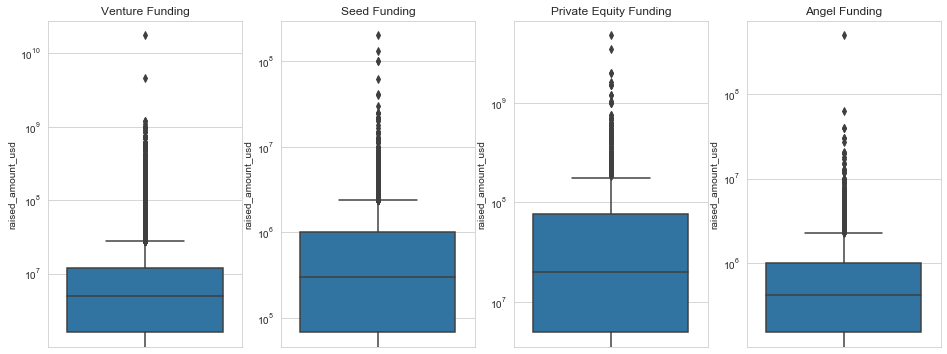

In [263]:
#plot showing the fraction of total investments (globally) in venture, seed, and private equity
import matplotlib.pyplot as plot

# the commonly used alias for seaborn is sns
import seaborn

# set a seaborn style of your taste
seaborn.set_style("whitegrid")

# excluding the Nan values
venture_Funding = venture_Funding[~numpy.isnan(venture_Funding)]
SeedFunding = SeedFunding[~numpy.isnan(SeedFunding)]
PrivateEquityFunding = PrivateEquityFunding[~numpy.isnan(PrivateEquityFunding)]
AngelFunding = AngelFunding[~numpy.isnan(AngelFunding)]

#Plot for venture funding type
plot.figure(figsize=(16, 6))
plot.subplot(1,4,1)
plot.title('Venture Funding')
plot.yscale('log')
seaborn.boxplot(y=venture_Funding)

#Plot for Seed funding type
plot.subplot(1,4,2)
plot.title('Seed Funding')
plot.yscale('log')
seaborn.boxplot(y=SeedFunding)

#Plot for Private Equity funding type
plot.subplot(1,4,3)
plot.title('Private Equity Funding')
plot.yscale('log')
seaborn.boxplot(y=PrivateEquityFunding)

#Plot for Angel funding type
plot.subplot(1,4,4)
plot.title('Angel Funding')
plot.yscale('log')
seaborn.boxplot(y=AngelFunding)
plot.show()

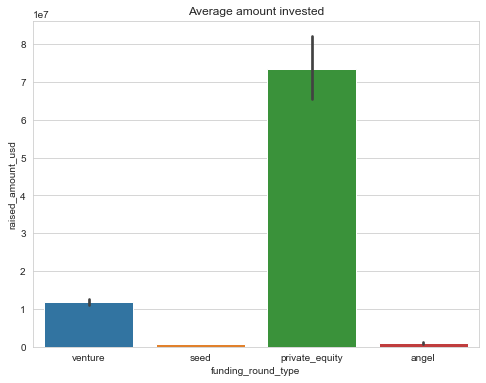

In [285]:
#average amount of investment in each funding type
import numpy
plot.figure(figsize=(8, 6))
plot.subplot(1, 1, 1)
seaborn.barplot(y='raised_amount_usd', x="funding_round_type", data=m_frame_plot, estimator=numpy.mean)
plot.title("Average amount invested")
plot.show()

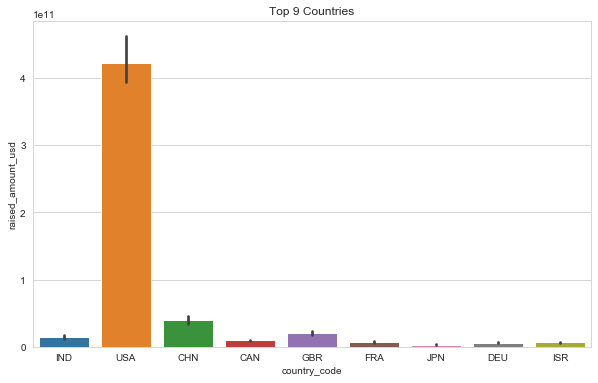

In [290]:
# Plotting top 9 countries against the total amount of investments
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
plot.figure(figsize=(10, 6))
plot.subplot(1, 1, 1)
seaborn.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plot.title("Top 9 Countries")
plot.show()

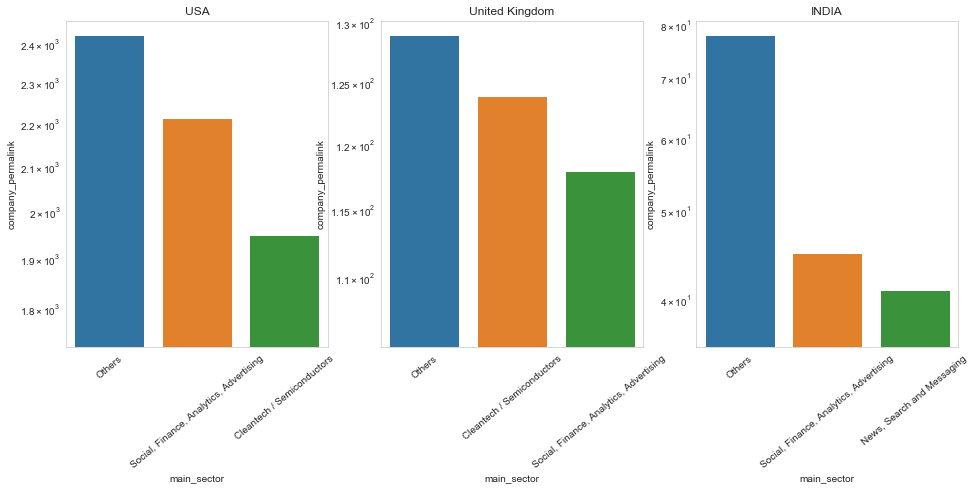

In [291]:
# Plot showing the number of investments in the top 3 sectors of the top 3 countries

plot.figure(figsize=(16,6))
plot.subplot(1,3,1)
plot.title('USA')
plot.yscale('log')
ax = seaborn.barplot(x=D1_USA.iloc[0:3,0], y='company_permalink', data=D1_USA)
plot.setp(ax.get_xticklabels(), rotation=40)

plot.subplot(1,3,2)
plot.title('United Kingdom')
plot.yscale('log')
bx = seaborn.barplot(x=D2_GBR.iloc[0:3,0], y='company_permalink', data=D2_GBR)
plot.setp(bx.get_xticklabels(), rotation=40)


plot.subplot(1,3,3)
plot.title('INDIA')
plot.yscale('log')
cx = seaborn.barplot(x=D3_INDIA.iloc[0:3,0], y='company_permalink', data=D3_INDIA)
plot.setp(cx.get_xticklabels(), rotation=40)
plot.show()